In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
#tf.config.experimental.enable_op_determinism()

In [1]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

In [4]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [6]:
val_seq = pad_sequences(val_input, maxlen=100)

In [8]:
from tensorflow import keras

train_oh = keras.utils.to_categorical(train_seq)

In [9]:
val_oh = keras.utils.to_categorical(val_seq)

## 단어 임베딩을 사용하기

In [10]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


2022-09-01 22:05:57.906612: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-01 22:05:57.906655: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-79-218.ap-northeast-2.compute.internal): /proc/driver/nvidia/version does not exist
2022-09-01 22:05:57.907710: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 18ms/step - loss: 0.6593 - accuracy: 0.6065 - val_loss: 0.6231 - val_accuracy: 0.6770
Epoch 2/100
313/313 [==============================] - 6s 18ms/step - loss: 0.6007 - accuracy: 0.7067 - val_loss: 0.5888 - val_accuracy: 0.7136
Epoch 3/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5714 - accuracy: 0.7371 - val_loss: 0.5666 - val_accuracy: 0.7338
Epoch 4/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5512 - accuracy: 0.7541 - val_loss: 0.5509 - val_accuracy: 0.7442
Epoch 5/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5342 - accuracy: 0.7643 - val_loss: 0.5477 - val_accuracy: 0.7464
Epoch 6/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5193 - accuracy: 0.7746 - val_loss: 0.5290 - val_accuracy: 0.7590
Epoch 7/100
313/313 [==============================] - 6s 18ms/step - loss: 0.5070 - accuracy: 0.7814 - val_loss: 0.5134 - val_accuracy:

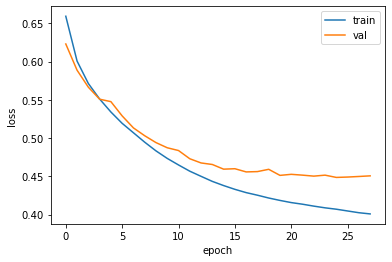

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()